# 习题课

## 1.文本

读取文本，分别统计其中英文字符数目，以及空白字符和数字的数目。并与Word软件中的统计结果相比较

In [ ]:
filename = "D:\\my study\\Python Study\\Lesson\\终端使用.txt"

f = open(filename,'r')
text = f.read()
n_blank = 0
n_digit = 0
n_english = 0
for i in text:
    if i == ' ':
        n_blank = n_blank+1
    elif (i >= 'a') and (i <= 'z') :  # 判断英文字符还是用这样的方式吧，比较好
        n_english = n_english + 1
    elif (i >= 'A') and (i <= 'Z') :
        n_english = n_english + 1
    elif i.isdigit():
        n_digit = n_digit + 1
    
print("空白字符的个数为:" + str(n_blank))
print("英文字符的个数为:" + str(n_english))
print("数字字符的个数为:" + str(n_digit))
print(text)

f.close()

空白字符的个数为:26
英文字符的个数为:82
数字字符的个数为:0
打开终端：windows+R  →  cmd  →  输入python可以进入python环境

终端下的DOS命令：
D:     改变路径到D盘
cd  改变目录
cd ..返回上层目录
dir    列出当前目录下文件和文件夹
del 删除文件
python 进入python运行环境
ipython 进入ipython增强运行环境
python ....py 运行脚本
exit() 退出终端或python环境

注意缩进


>- 标准答案

In [3]:
s = open(filename).read()
letters = 0 ; space = 0 ; digit = 0 
for c in s :
    letters += c.isalpha() # 判断字母
    space += c.isspace() # 判断空格
    digit += c.isdigit() # 判断数字

print('char = {:.0f},digit = {:.0f}'.format(letters,digit))
print('space = {:.0f}'.format(digit))

char = 162,digit = 0
space = 0


# Python 字符串格式化方式对比表

| 格式化方式 | 语法示例 | 说明 |
|-----------|----------|------|
| **位置参数格式化** | `'{0} {1}'.format(a, b)` | 明确指定参数位置，可重复使用 |
| **自动顺序格式化** | `'{} {}'.format(a, b)` | 按参数顺序自动填充 |
| **f-string** | `f'{a} {b}'` | 最简洁直观，在字符串内直接嵌入变量 |
| **数字格式化** | `'{:.2f}'.format(3.1415)` | 控制数字格式（小数位、对齐等） |
| **老式%格式化** | `'%s %d' % ('hello', 42)` | 旧式格式化，不推荐在新代码中使用 |

## 2.物理

一球从100米高度自由落下，每次落地后跳回原来高度的一半；再落下，求它在第10次落地时，共经过多少米？第10次反弹多高？

In [35]:
height = 0
height_ini = 100

for i in range(10):
    height = height + height_ini
    height_ini = height_ini / 2
    height = height + height_ini

print("第十次落地后，共经过" + str(height - height_ini) + "m" , "\n第十次反弹" + str(height_ini) + "m")

第十次落地后，共经过299.609375m 
第十次反弹0.09765625m


## 3.数学

有n个人围成一圈，顺序排号。从第一个人开始报数（从1到3报数），凡报到3的人退出圈子，问最后留下来的是原来第几号的那位？

In [ ]:
import numpy as np
n = 100

origin = list(range(1,n+1))
later = origin     # 这一步其实是无用功
for j in range(n-1):
     for i in range(3):
         if i == 2:
             if i + j * 2 <= n - j:     # 这一步其实也有问题，索引可能会越界，因为是往后报的
                 del later[i + 2 * j]
             else:
                 del later[(i + j * 2 ) % (n - j) ]
        
print(later)

[88]


>- 标准答案

这道题的难点在于每次有人退出圈子会导致数组的大小也在不停地变化，于是正确答案非常机制地采用0-1变量来表示是否退出圈子

In [7]:
n = 100
i = 0 ; k = 0
num = [1] * n # 生成n个1组成的一维数组

while sum(num) > 1 :
    k = k + num[i]
    if k == 3 :
        num[i] =0 ; k = 0 # 报到3的变成0，并且k=0表示从头开始选3个一组的
    i = (i + 1) % n # 这个其实就相当于是i往后加，一旦加过了就重新开始

j = 0
while num[j] == 0:
    j += 1
print(j)


90


## 4.作图

函数$ 17x^{2} - 16|x|y + 17y^2 =225  $

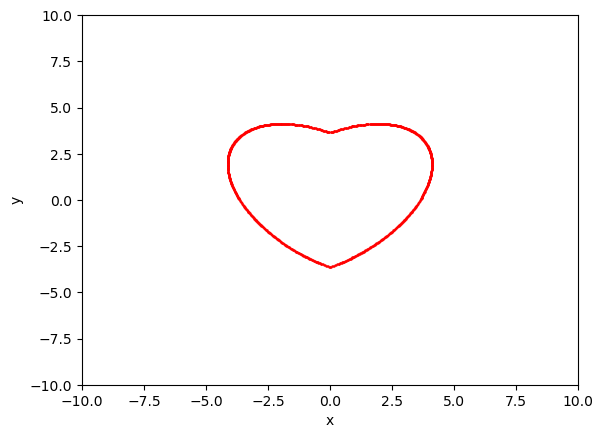

In [26]:
import numpy as np
import matplotlib.pyplot as plt

n = 1000
x = np.linspace(-10,10,n)
y_wait = np.linspace(-10,10,n)
mini = 1
index = 0
y = 0
plt.figure()
for i in range(n):
    for j in range(n):
         b = 17 * x[i] ** 2 - 16 * np.abs(x[i]) * y_wait[j] + 17 * y_wait[j] ** 2 -225
         if abs(b) < mini: # 记得算差值的时候一定是用绝对值来判断
              index = j
              y = y_wait[j]
              plt.scatter(x[i],y,s=0.5,c='red')
         index = 0

plt.xlim([-10,10])
plt.ylim([-10,10])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

>- 正确答案

这种很难算的隐函数，可以考虑用等高线，只展示差值为0的那条线

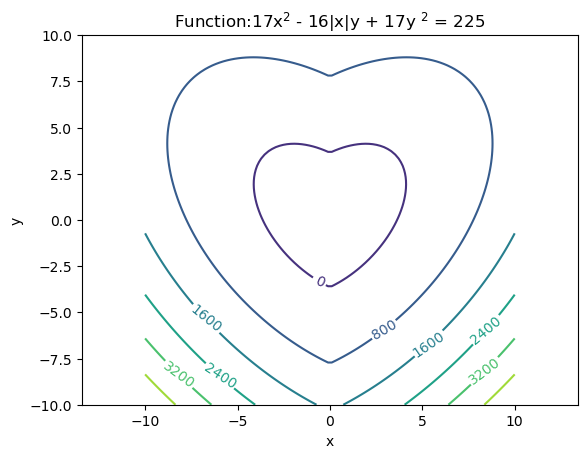

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-10,10,100)
y = np.linspace(-10,10,100)
X,Y = np.meshgrid(x,y)

Z = 17 * X ** 2 - 16 * np.abs(X) * Y + 17 * Y ** 2 -225

cs = plt.contour(X,Y,Z) # levels = [0]表示只画高度为0的线
plt.clabel(cs,inline = 1) # inline = 1表示把数字写在等高线上
plt.xlabel('x')
plt.ylabel('y')
plt.title('Function:17x$^2$ - 16|x|y + 17y $^2$ = 225')
plt.axis('equal')
plt.show()

## 5.统计

In [ ]:
import random
n = 1000
win = 0
guess = 0
guess_new = 0
n_win1 = 0
n_win2 = 0
for i in range(n):
     win = random.randint(1,3)
     guess = random.randint(1,3)
     # 如果选择不更换
     if win == guess:
          n_win1 = n_win1 + 1
     # 如果选择更换
     else:
          guess_new = random.randint(1,3) # 猜肯定是根据主持人开门的情况来猜，这样太草率了
          while guess_new == guess:
               guess_new = random.randint(1,3)
          if guess_new == win:                    
             n_win2 = n_win2 + 1
          
print("如果选择不更换，那么在" + str(n) + "次测试中，拿到汽车的次数是" + str(n_win1))
print("如果选择更换，那么在" + str(n) + "次测试中，拿到汽车的次数是" + str(n_win2))

if n_win1 > n_win2:
     print("还是不更换的好")
else:
     if n_win1 < n_win2:
         print("还是更换吧")
     else:
          print("均可！")

如果选择不更换，那么在1000次测试中，拿到汽车的次数是345
如果选择更换，那么在1000次测试中，拿到汽车的次数是312
还是不更换的好


>- 正确答案

难点：跟着过程的步骤走

In [ ]:
import random
def monty_hall_simu(switch,times = 10000):
    win_count = 0
    for _ in range(times):
        doors = [1,2,3]
        car_door = random.choice(doors)
        chosen_door = random.choice(doors)  # 有车的门和自己开的门是随机选择的
        doors.remove(chosen_door)  # 主持人开的门肯定不会是选的门，因此现将其去掉

        # 主持人开门
        if chosen_door == car_door: # 既然已经选中，那么剩下两个都是羊，随便开一个
            opened_door = random.choice(doors)
        else:
            opened_door = list(set(doors)-set([car_door]))[0]   # 没选中，那就开另一个羊

        # 如果选择换门
        if switch:
            chosen_door = random.choice(list(set(doors)-set([chosen_door])-set([opened_door])))# 换的门首先不是自己之前的，也不是开过的
            
        if chosen_door == car_door:
            win_count += 1

    return win_count

print(monty_hall_simu(1,times=10000))

6771


## 6.定积分计算

计算定积分$\int_{0}^{1} e^{-x^{2}} dx$

In [ ]:
import numpy as np
n = 100000
R = 0
for i in range(n):
    x = i/n
    dx = 1/n
    R = R + np.e ** (-x ** 2) * dx  # 首和尾记得要考虑哦，还有梯形/矩形计算

print("定积分的结果是:" + str(R))

定积分的结果是:0.7468272934090888


>- 标准答案

定积分的定义严格来说是面积，但是面积需要考虑到边与高到底是多少。

矩形的计算固然也是准确的，但是由于y在持续变化，因此用梯形的模型更为准确。

In [ ]:
def f(x):
    return np.exp(-x ** 2)

def interg(func,a,b,n):
    x = np.linspace(a,b,n+1)
    y = func(x)
    h = (b-a) / n # n+1个点可以分成n+1个区间
    return h*(0.5*y[0]+0.5*y[-1]+np.sum(y[1:-1]))  # 定积分计算：梯形——上底加下底乘高除以2

n = 1000
resu = interg(f,0,1,n)
print(resu)

0.7468240714991847


## 7.猜拳模拟器

编写猜拳程序，与机器游戏10局

In [ ]:
import random
tot = ["石头","剪刀","布"]
rob = random.choice(tot)
guess = input("您出（石头剪刀布）:")
if guess == "石头":
    if rob == tot[0]:
        print("平局")
    if rob == tot[1]:
        print("您赢了")
    if rob == tot[2]:
        print("您输了")

if guess == "剪刀":
    if rob == tot[0]:
        print("您输了")
    if rob == tot[1]:
        print("平局")
    if rob == tot[2]:
        print("您赢了")

if guess == "布":
    if rob == tot[0]:
        print("您赢了")
    if rob == tot[1]:
        print("您输赢了")
    if rob == tot[2]:
        print("平局")
         


>- 标准答案

如果对于不同的输入情况均去讨论结果，显得有些复杂，可以用字典，规定游戏规则。

In [ ]:
import random
c = {'r':'石头','s':'剪刀','p':'布'}
r = {'r':'p','s':'r','p':'s'}
u = input('请您输入石头剪刀布(r/s/p):')
p = random.choice('rsp')
print(f'You:{c[u]} PC:{c[p]}')
if u == p :
    print("Drawn!")
elif r[u] == p :
    print("You Lose!")
else:
    print("You Win!")

## 8.雨滴的速度

雨滴从10000米高空自由下落（初速度$v_0=0,g=9.81m/s^2$）

绘制左右双子图，分别显示速度和高度随时间的变化情况

进阶：考虑空气阻力（$F_a=kv^2,k=0.1$），比较两种情况的落地时间和末速度差异。

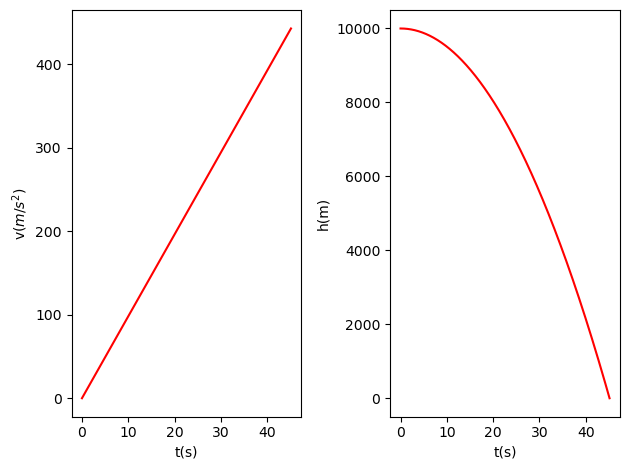

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
h = 10000
g = 9.81
v = 0
n = 1000
t_max = np.sqrt(2 * h / g)
t = np.linspace(0,t_max,n)
v_new = v + g * t
h_new = h - g * t ** 2 /2

# 子图创建
fig,ax = plt.subplots(1,2)
ax[0].plot(t,v_new,color = 'red')  # 易错:子图索引
ax[0].set_xlabel('t(s)')
ax[0].set_ylabel('v($m/s^2$)')
ax[1].plot(t,h_new,color = 'red')
ax[1].set_xlabel('t(s)')
ax[1].set_ylabel('h(m)')
plt.tight_layout()
plt.show()



| subplots参数 | ax索引方式 | 说明 |
|--------------|------------|------|
| `subplots(1, n)` | `ax[i]` | 一维索引 |
| `subplots(m, n)` | `ax[i, j]` | 二维索引 |

进阶需要数值求解微分方程

# 2024年Python基础期末考试

## 1.算出100以内的所有质数并保存到文件中

In [ ]:
# 法一：使用0-1变量记录是否被删去
import numpy as np
filename = "D:\\my study\\Python Study\\Lesson\\2024_1.txt"
f = open(filename,'w')
f.write(str(1) + '\n')  # 1不是质数!
f.write(str(2) + '\n')
n = 100
x = np.ones(n)  # 发现这样比列表当中删去要不容易错（0-1变量）

for i in range(3,n+1,1):
    for j in range(2,i):
        if i % j == 0:
            x[i - 1] = 0
    if x[i - 1] == 1:
        f.write(str(i) + '\n')

f.close()

3
5
7
11
13
17
19
23
29
31
37
41
43
47
53
59
61
67
71
73
79
83
89
97


易错:

1.想用break但是发现对于break还是不很了解

2.对于质数的判断感觉还不是非常地严谨？还要把1和2单拎出去。以及最后的结果总感觉哪里怪怪的

- 1不属于质数!


## Python 中 break 的用法总结

- `break`：**立即结束当前这一层循环**
- 只作用于最近的 `for / while` 循环，不能使用在循环外、单独的`if`
- 常用`if`来条件判断，满足条件`break`跳出上一级循环



>- 参考答案

也可以用True和False来标记

In [19]:
filename = "D:\\my study\\Python Study\\Lesson\\2024_1.txt"

def judge(n):
    if n == 0 or n == 1:
        return False
    else:
        label = True
        for i in range(2,n):
            if n % i == 0 :
                label = False
        return label
    
nums = []
for k in range(100):
    if judge(k):
        nums.append(k)
        
print(nums)
file = open(filename,'w')
data = '\n'.join([str(k) for k in nums])
file.write(data)
file.close()

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97]


## 2.把二维`numpy`数组的每一列都绘制一条曲线，并添加图注

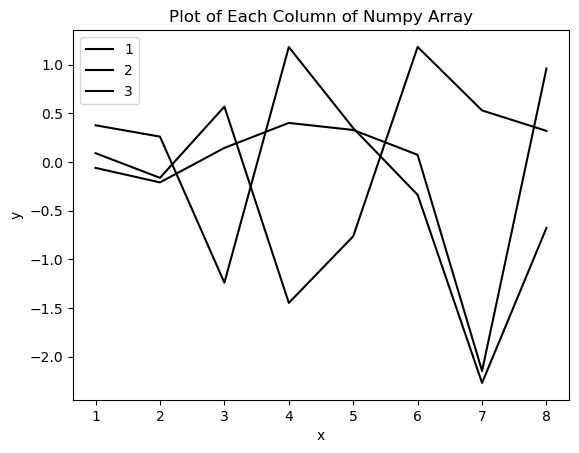

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

# 关于random以及np.random我觉得我还需要去看一下
j = random.randint(2,10)       # 生成[2,10]的随机整数
k = random.randint(2,10)
a = np.random.randn(j,k)       # 生成标准正态分布
n = np.shape(a)[0]
n_num = np.shape(a)[1]
x = np.linspace(1,n,n)

plt.figure()
for i in range(n_num):
    plt.plot(x,a[:,i],label = str(i + 1),color = 'black')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of Each Column of Numpy Array')
plt.legend(loc = 0)
plt.show()

- random和numpy.random

|random下的函数|用法|numpy.random下的函数|用法|
|----------|---------|----------|----------|
|`random.randint(a,b)`|生成[a,b]之间的随机整数|`numpy.random.randint(a,b,size=)`|生成[a,b)之间的size的随机整数|
|`random.randrange(start,stop,step)`|start默认0，step默认1，按步长左闭右开随机生成整数|`numpy.random.randn(size=)`|生成size的标准正态分布,即使是二维，也不需要size框起来|
|`random.random()`|生成[0.0,1.0)的随机浮点数|`numpy.random.random()`|生成[0.0,1.0)之间的随机浮点数，二维对应的size需要框起来|
|`random.uniform(a,b)`|返回[a,b]的均匀分布|`numpy.random.uniform(low= ,high = ,size= )`|生成[low,high)均匀分布|
|`random.choice()`|随机选择一个元素|`numpy.random.normal(loc = ,scale= ,size = )`|一维高斯分布(scale是标准差)|
|`random.sample(  , k)`|从总体中选择k个随机元素，结果是字符串列表|`numpy.random.poisson(lam = ,size)`|泊松分布(默认$\lambda$为1)|
|`random.shuffle()`|洗牌|`numpy.random.rand(i,j)`|生成i*j随机数组|

>- 参考答案

- 数组可以直接画图（对于每行进行）

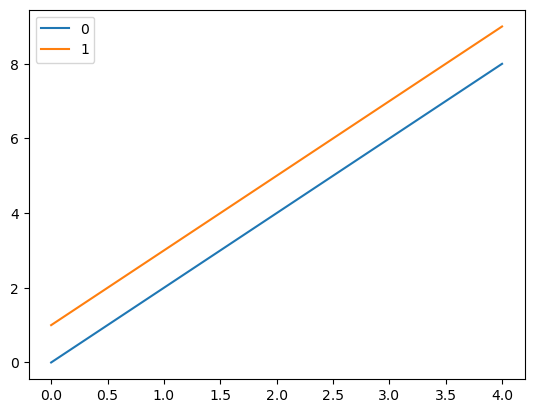

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure()
input = np.arange(10).reshape(5,-1)  # 创建一个五行两列的数组
input = input.T  # 变成五列两行
for data in input:  # 对于每一行
    plt.plot(data,label = str(data[0])) # 可以只含有一个变量，那么默认为因变量，横坐标为从0开始往后标（即索引）
plt.legend()
plt.show()

## 3.创建一个奇数行都是2，其余都是0的10*10矩阵

In [ ]:
import numpy as np
x = np.zeros([10,10])  # 注意方括号里面的才表示几行几列
for i in range(0,10,2):
    x[i,:] = 2

print(x)

[[2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


## 4.已知平面上散落点的坐标，画出一个包含所有点的大圆

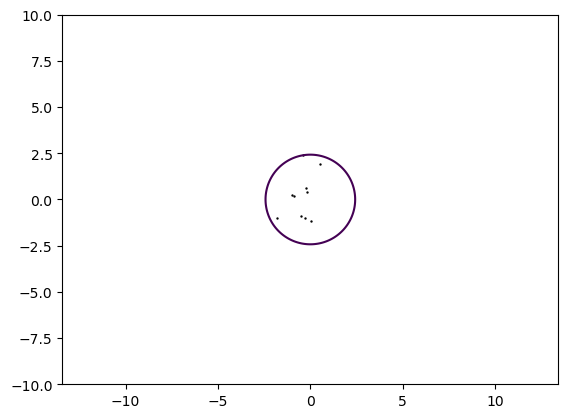

In [1]:
import numpy as np
import matplotlib.pyplot as plt
n = 10
x = np.random.randn(n)
y = np.random.randn(n)
R = 0
for i in range(n):
    dis = np.sqrt(x[i] ** 2 + y[i] ** 2)
    if R < dis:
        R = dis

plt.figure()
plt.scatter(x,y,s = 0.5,color = 'black')
x_new = np.linspace(-n,n,n*1000)
y_new = np.linspace(-n,n,n*1000)
X,Y = np.meshgrid(x_new,y_new)
Z = X ** 2 + Y ** 2 -R ** 2
plt.contour(X,Y,Z,levels = [0])
plt.xlim([-n,n])
plt.ylim([-n,n])
plt.axis('equal') # 可以让图形看上去没有那么“椭”

plt.show()    

## 给下面代码添加注释并给出输出结果

In [2]:
import numpy as np

a = np.arange(10).reshape(2,-1)
# [[0,1,2,3,4],
#  [5,6,7,8,9]]
print(a)
print(a[0])
# [0,1,2,3,4]
print(a[:,2])
# [2,7]
print(a[0][::2])
# [0,2,4]

[[0 1 2 3 4]
 [5 6 7 8 9]]
[0 1 2 3 4]
[2 7]
[0 2 4]


In [3]:
a = [0,1,2,3]
b = a
b.append(4)
print(a,b)
# 输出都是[0,1,2,3,4]

[0, 1, 2, 3, 4] [0, 1, 2, 3, 4]


In [4]:
def modifty(data):
    for key in data.keys():
        data[key] += 1
    return data

data = {'a':1,'b':2,'c':3}
modifty_data = modifty(data)
print(modifty_data)
# {'a':2,'b':3,'c':4}

{'a': 2, 'b': 3, 'c': 4}


In [5]:
count = 0
count_max = 10
a = 1 ; b = 1
while count < count_max:
    a , b = b, a + b
    print(a,end = ',')
    count = count + 1

# 1, 
# 2,
# 3,
# 5,
# 8,
# 13,
# 21,
# 34
# 55,
# 89,

1,2,3,5,8,13,21,34,55,89,

> `print`函数参数

`print(a,b,c,sep = , end = )`

sep表示多个参数之间用什么隔开

end决定整行最后用什么结尾，默认为'\n'

In [6]:
def jc(n):
    """jc function"""
    resu = 1
    for i in range(1,n+1,2):
        resu *= i
    return resu
n = 7
res = jc(n)
print('jc of {} is {}.'.format(n,res))
# 'jc pf 7 is 105.'

jc of 7 is 105.
